Siddhant Gupta

50441839

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [39]:
dataset = pd.read_csv('water_potability.csv')

In [40]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Potability (Target Var):

Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [41]:
print("original shape:   ", dataset.shape)

original shape:    (3276, 10)


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


As we can see there are lot of NAN value . We replace them with mode of the col.

In [44]:
dataset['ph'].fillna(dataset['ph'].mode()[0], inplace=True)

In [45]:
dataset['Sulfate'].fillna(dataset['Sulfate'].mode()[0], inplace=True)

In [46]:
dataset['Trihalomethanes'].fillna(dataset['Trihalomethanes'].mode()[0], inplace=True)

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [48]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,129.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,129.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


                                       Correlation Matrix                                       


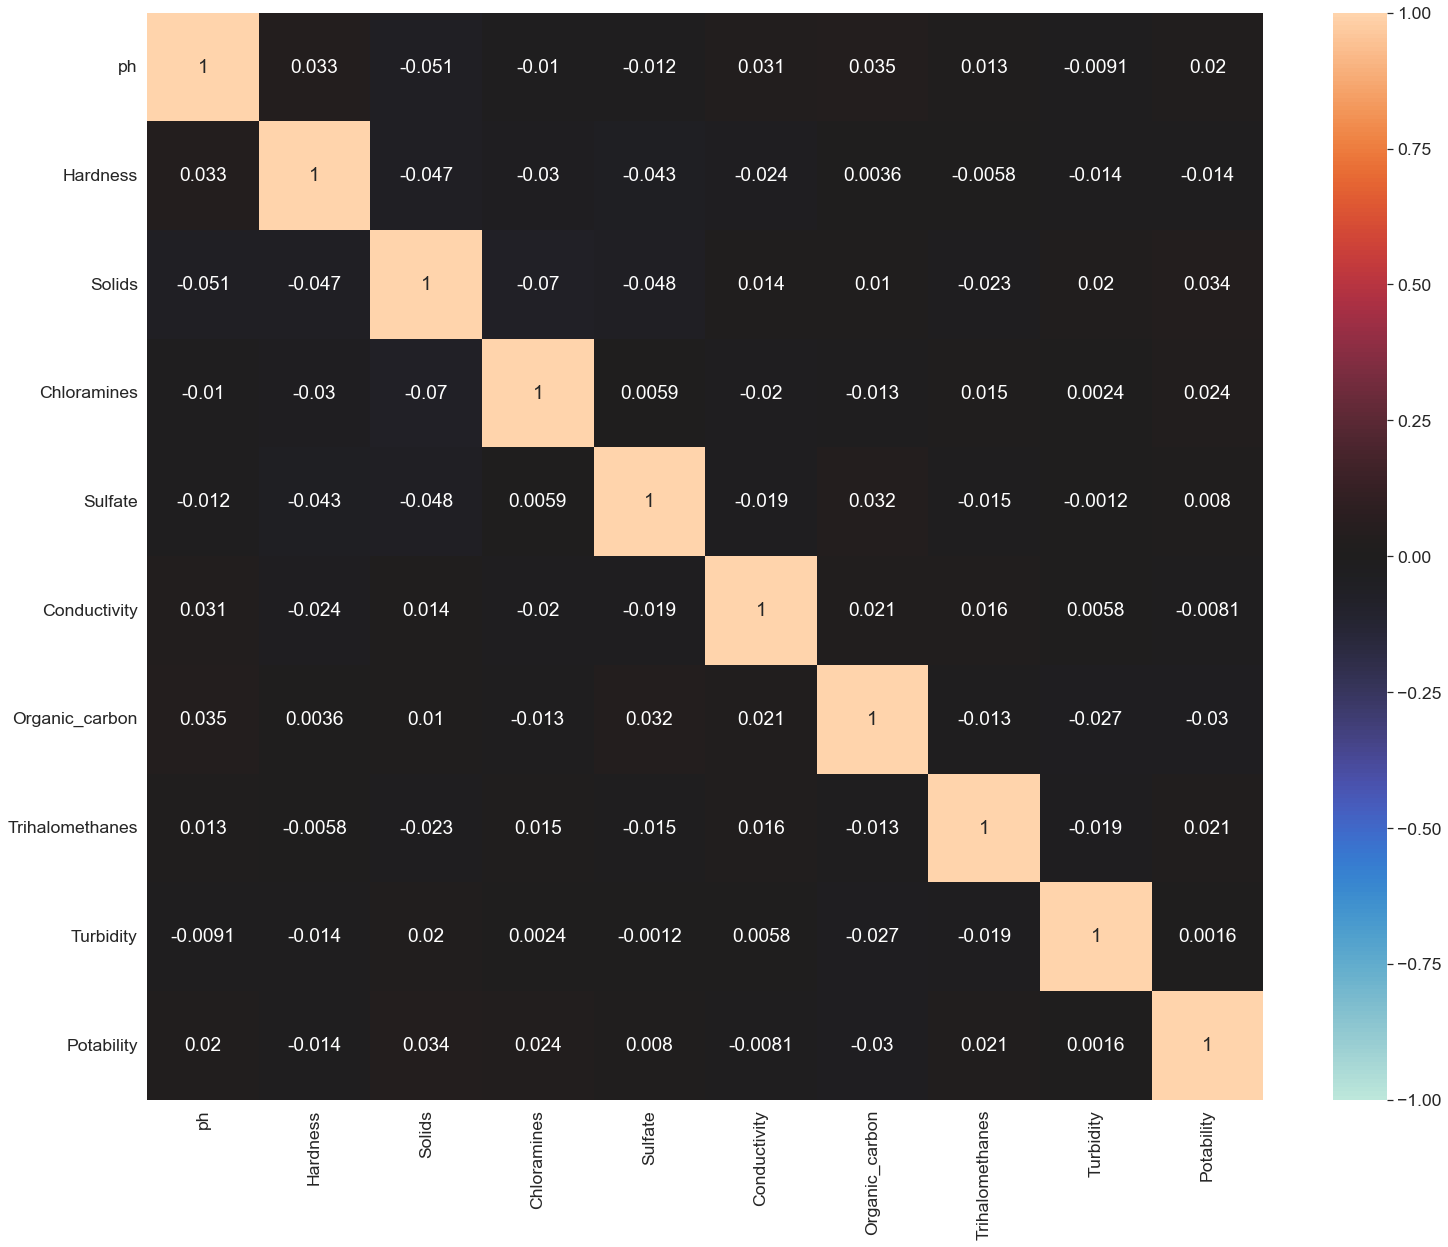

In [50]:

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(dataset.corr(), annot=True, vmin=-1, vmax=1, center=0) 
plt.show()

In [52]:
from sklearn import preprocessing

scale = preprocessing.MinMaxScaler()


In [53]:
df = pd.DataFrame(scale.fit_transform(dataset.values), columns=dataset.columns, index=dataset.index)

In [54]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.000000,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.000000,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0


In [72]:
Y= df['Potability']

In [60]:
X = df.drop('Potability', axis=1,)

In [61]:
pca = PCA(n_components=9)

In [62]:
pca.fit(X)

PCA(n_components=9)

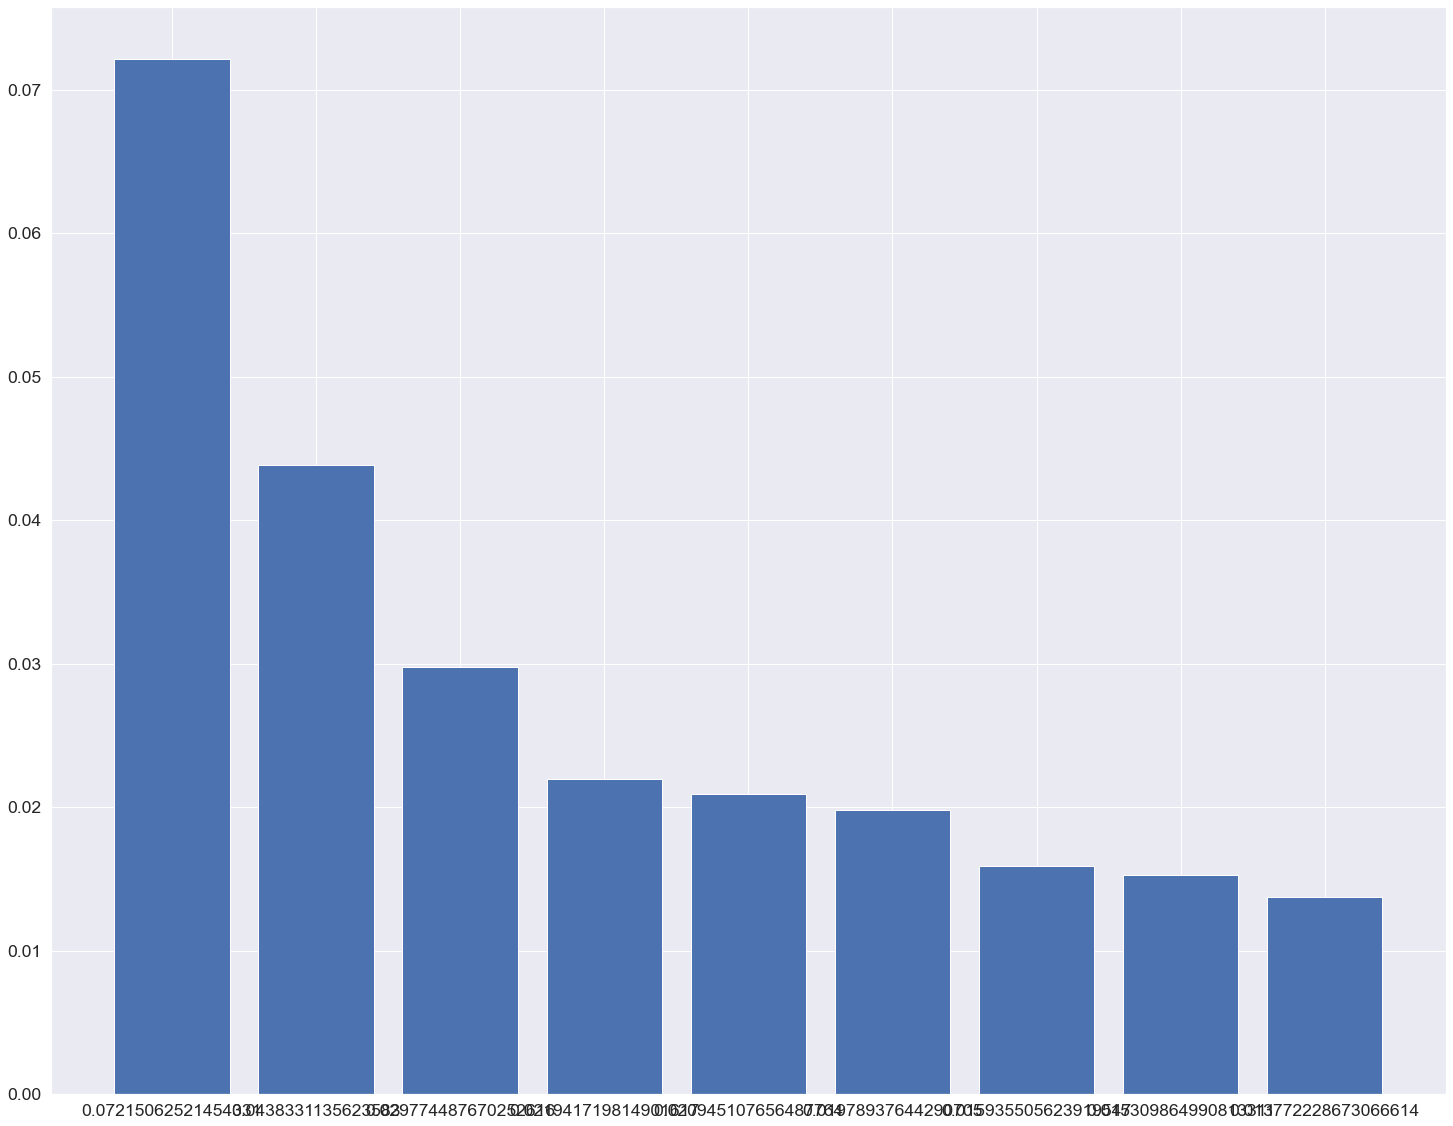

In [65]:
import matplotlib.pyplot as plt

# Make a random dataset:

bars = X.columns


y_pos = np.arange(len(bars))

# Create bars
plt.figure(figsize=[25,20])
plt.bar(y_pos,pca.explained_variance_ )

# Create names on the x-axis
plt.xticks(y_pos, pca.explained_variance_)

# Show graphic
plt.show()

In [66]:
for i in pca.explained_variance_:
    print(float(i))

0.07215062521454331
0.0438331135623583
0.029774487670252616
0.021941719814901617
0.020945107656487764
0.01978937644290705
0.015935505623919547
0.015309864990813311
0.013772228673066614


Looking at the bar plot let n_comp =5 

In [67]:
pca = PCA(n_components=5)
pca.fit(X)

PCA(n_components=5)

In [68]:
X_pca = pca.transform(X)

In [69]:
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (3276, 9)
transformed shape: (3276, 5)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X_pca, Y, test_size = 1/4, random_state = 0) 

In [74]:
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [75]:
y_pred = classifier.predict(X_test)

In [76]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(Y_test, y_pred)

In [77]:
cm

array([[502,   0],
       [317,   0]])

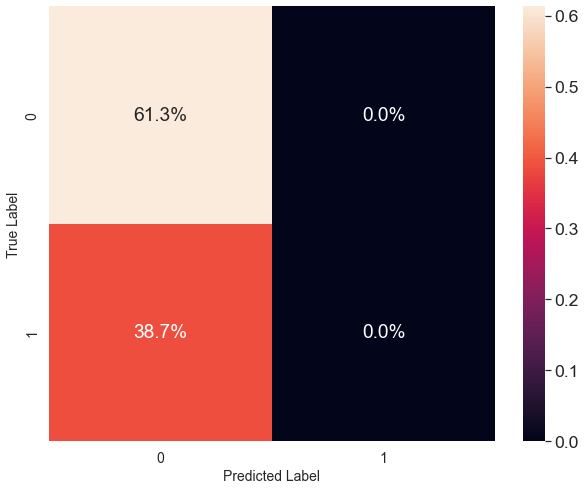

In [80]:
cf_matrix = confusion_matrix(Y_test, y_pred)
fig = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.6)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
plt.xlabel('Predicted Label', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [86]:
from sklearn.metrics import precision_score,accuracy_score
LR_score = precision_score(Y_test, y_pred,average='macro')

/Users/siddhantgupta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
LR_score

0.3064713064713065

In [88]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [89]:
y_pred = classifier.predict(X_test)

In [91]:
cm = confusion_matrix(Y_test, y_pred)

In [92]:
cm

array([[321, 181],
       [187, 130]])

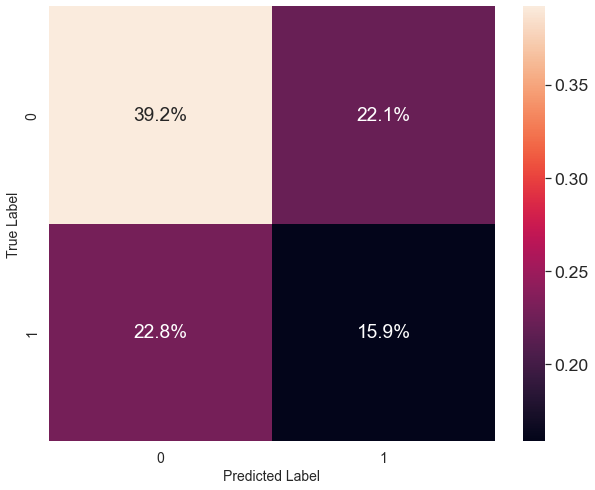

In [93]:
cf_matrix = confusion_matrix(Y_test, y_pred)
fig = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.6)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%')
plt.xlabel('Predicted Label', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [97]:
from sklearn import tree

In [100]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= 0.35
|   |--- feature_1 <= 0.32
|   |   |--- feature_1 <= 0.02
|   |   |   |--- feature_0 <= 0.23
|   |   |   |   |--- feature_0 <= -0.46
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_0 >  -0.46
|   |   |   |   |   |--- feature_1 <= -0.44
|   |   |   |   |   |   |--- feature_0 <= -0.43
|   |   |   |   |   |   |   |--- feature_0 <= -0.44
|   |   |   |   |   |   |   |   |--- feature_2 <= -0.05
|   |   |   |   |   |   |   |   |   |--- feature_2 <= -0.20
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- feature_2 >  -0.20
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- feature_2 >  -0.05
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- feature_0 >  -0.44
|   |   |   |   |   |   |   |   |--- feature_2 <= -0.10
|   |   |   |   |   |   |   |   |   |--- feature_4 <= -0.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   

In [101]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

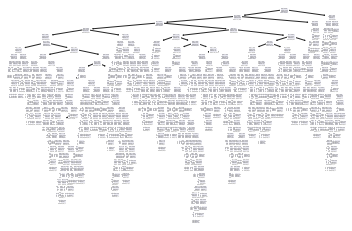

In [103]:
tr = tree.plot_tree(classifier);

In [105]:
tr_score = precision_score(Y_test, y_pred,average='macro')

In [106]:
tr_score

0.5249480973238474